In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from perovskite_prediction_api.common.storage import GoogleDriveStorage
from perovskite_prediction_api.common.credentials import google_credentials

In [2]:
storage = GoogleDriveStorage(google_credentials())
df = storage.download_dataframe("perovskite/prepared/data.csv")
df

,Cell_stack_sequence,Cell_area_total,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,Module,Module_number_of_cells_in_module,...,B_1_coef,B_2_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef
0,SLG | ITO | PEDOT:PSS | Perovskite | PCBM-70 |...,NaN,0.06,0,pin,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
1,SLG | ITO | PEDOT:PSS | Perovskite | PCBM-70 |...,NaN,0.06,0,pin,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
2,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
3,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
4,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.06,0,nip,False,False,nan; nan,False,0,...,1,0.0,Br,I,0,0,0.51,2.49,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47458,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.20,0,nip,False,False,nan; nan,False,0,...,0,0.0,Br,I,0,0,2.16,0.84,0.0,0
47459,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Cu...,NaN,0.25,0,nip,False,False,nan; nan,False,0,...,0,0.0,I,0,0,0,3,0,0.0,0
47460,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.15,0,nip,False,False,nan; nan,False,0,...,0,0.0,I,0,0,0,3,0,0.0,0
47461,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.12,0,nip,False,False,nan; nan,False,0,...,0,0.0,Br,I,0,0,0.45,2.55,0.0,0


### We will predict TS80 - the time it took for that specific solar cell's efficiency to fall to 80% of its initial value (e.g., 500 hours, 1200 hours, 850 hours).

In [3]:
# drop na TS80
nan_mask = df["TS80"].isna()
print(f"NaN count in TS80 - {nan_mask.sum()}")
df = df[~nan_mask]
df

NaN count in TS80 - 41275


,Cell_stack_sequence,Cell_area_total,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,Module,Module_number_of_cells_in_module,...,B_1_coef,B_2_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef
2,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
3,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
4,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.06,0,nip,False,False,nan; nan,False,0,...,1,0.0,Br,I,0,0,0.51,2.49,0.0,0
5,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | BD...,NaN,0.09,0,nip,False,False,nan; nan,False,0,...,1,0.0,Br,I,0,0,0.45,2.55,0.0,0
6,SLG | FTO | SnO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.16,0,nip,False,False,nan; nan,False,0,...,1,0.0,Br,I,0,0,0.369,2.631,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,SLG | FTO | SnO2 | Perovskite | Spiro-MeOTAD | Au,NaN,0.05,0,nip,False,False,nan; nan,False,0,...,0,0.0,0,0,0,0,0,0,0.0,0
6992,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
6993,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
6994,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.16,0,nip,False,False,nan; nan,False,0,...,0,0.0,Br,I,0,0,0.45,2.55,0.0,0


In [4]:
# we will check some columns for NaN and unknown values
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6188 entries, 2 to 6995
Data columns (total 280 columns):
 #    Column                                                          Non-Null Count  Dtype  
---   ------                                                          --------------  -----  
 0    Cell_stack_sequence                                             6188 non-null   object 
 1    Cell_area_total                                                 137 non-null    float64
 2    Cell_area_measured                                              6053 non-null   float64
 3    Cell_number_of_cells_per_substrate                              6188 non-null   int64  
 4    Cell_architecture                                               6188 non-null   object 
 5    Cell_flexible                                                   6188 non-null   bool   
 6    Cell_semitransparent                                            6188 non-null   bool   
 7    Cell_semitransparent_wavelength_range        

In [5]:
# drop some nan columns
threshold = 6000
columns_to_drop = [col for col in df.columns if df[col].isna().sum() > threshold]
columns_to_drop

['Cell_area_total',
 'Perovskite_deposition_quenching_media_mixing_ratios',
 'HTL_additives_concentrations',
 'JV_light_source_brand_name',
 'JV_light_mask_area',
 'JV_preconditioning_protocol']

In [6]:
df = df.drop(columns=columns_to_drop)
df

,Cell_stack_sequence,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,Module,Module_number_of_cells_in_module,Module_JV_data_recalculated_per_cell,...,B_1_coef,B_2_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef
2,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
3,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
4,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.06,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.51,2.49,0.0,0
5,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | BD...,0.09,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.45,2.55,0.0,0
6,SLG | FTO | SnO2-c | Perovskite | Spiro-MeOTAD...,0.16,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.369,2.631,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,SLG | FTO | SnO2 | Perovskite | Spiro-MeOTAD | Au,0.05,0,nip,False,False,nan; nan,False,0,False,...,0,0.0,0,0,0,0,0,0,0.0,0
6992,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
6993,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
6994,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,0.16,0,nip,False,False,nan; nan,False,0,False,...,0,0.0,Br,I,0,0,0.45,2.55,0.0,0


In [7]:
# we do not need JV features - drop
df = df.drop(columns=[col for col in df.columns if col.startswith("JV")])
df

,Cell_stack_sequence,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,Module,Module_number_of_cells_in_module,Module_JV_data_recalculated_per_cell,...,B_1_coef,B_2_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef
2,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
3,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
4,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.06,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.51,2.49,0.0,0
5,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | BD...,0.09,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.45,2.55,0.0,0
6,SLG | FTO | SnO2-c | Perovskite | Spiro-MeOTAD...,0.16,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.369,2.631,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,SLG | FTO | SnO2 | Perovskite | Spiro-MeOTAD | Au,0.05,0,nip,False,False,nan; nan,False,0,False,...,0,0.0,0,0,0,0,0,0,0.0,0
6992,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
6993,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
6994,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,0.16,0,nip,False,False,nan; nan,False,0,False,...,0,0.0,Br,I,0,0,0.45,2.55,0.0,0


In [8]:
# extract the columns which we need
features_for_stability_model = [
    # --- Composition Features (The "Recipe") ---
    'Perovskite_composition_inorganic',
    'Perovskite_composition_leadfree',
    'Perovskite_band_gap',
    'A_1', 'A_2', 'A_3', 'A_4',
    'A_1_coef', 'A_2_coef', 'A_3_coef', 'A_4_coef',
    'B_1', 'B_2',
    'B_1_coef', 'B_2_coef',
    'C_1', 'C_2', 'C_3',
    'C_1_coef', 'C_2_coef', 'C_3_coef',

    # --- Architecture & Structure Features (The "Blueprint") ---
    'Cell_architecture',
    'Perovskite_dimension_2D',
    'Perovskite_dimension_3D',
    'Perovskite_dimension_2D3D_mixture',
    'Perovskite_dimension_3D_with_2D_capping_layer',
    'ETL_stack_sequence',
    'HTL_stack_sequence',
    'Backcontact_stack_sequence',

    # --- Fabrication & Process Features (The "Instructions") ---
    'Perovskite_deposition_procedure',
    'Perovskite_deposition_quenching_induced_crystallisation',
    'Perovskite_deposition_solvent_annealing',

    # --- Device & Test Condition Features ---
    'Cell_area_measured',
    'Encapsulation',

    # target
    'TS80'
]
df = df[features_for_stability_model]
df

,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,...,Perovskite_dimension_3D_with_2D_capping_layer,ETL_stack_sequence,HTL_stack_sequence,Backcontact_stack_sequence,Perovskite_deposition_procedure,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_solvent_annealing,Cell_area_measured,Encapsulation,TS80
2,False,False,1.60,MA,0,0,0,1,0,0,...,False,TiO2-c,Spiro-MeOTAD,Au,Spin-coating,True,False,0.04,False,220.00000
3,False,False,1.60,MA,0,0,0,1,0,0,...,False,TiO2-c,Spiro-MeOTAD,Au,Spin-coating,True,False,0.04,False,350.00000
4,False,False,1.59,Cs,FA,MA,0,0.05,0.788,0.162,...,False,TiO2-c,Spiro-MeOTAD,Au,Spin-coating,True,False,0.06,False,200.00000
5,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,False,TiO2-c | TiO2-mp,BDT2FMeDPA,Carbon,Spin-coating,True,False,0.09,False,1524.89000
6,False,False,NaN,Cs,FA,MA,0,0.05,0.827,0.123,...,False,SnO2-c,Spiro-MeOTAD,Au,Spin-coating,True,False,0.16,False,150.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,False,False,NaN,0,0,0,0,0,0,0,...,False,SnO2,Spiro-MeOTAD | MoO3,Au,Spin-coating,False,False,0.05,False,23.68560
6992,False,False,NaN,MA,0,0,0,1,0,0,...,False,TiO2-c | TiO2-mp,"N2,N2,N12,N12-Tetrakis(4-methoxyphenyl)-9-meth...",Ag,Spin-coating,True,False,0.04,False,72.00000
6993,False,False,NaN,MA,0,0,0,1,0,0,...,False,TiO2-c | TiO2-mp,"N2,N2,N12,N12-Tetrakis(4-methoxyphenyl)-9-meth...",Ag,Spin-coating,True,False,0.04,False,2192.57000
6994,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,False,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,Spin-coating,True,False,0.16,False,101.40700


In [9]:
# drop cell area measured NaN
df = df.dropna(subset=["Cell_area_measured"])
print("DF length -", df.shape[0])

DF length - 6053


In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6053 entries, 2 to 6995
Data columns (total 35 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Perovskite_composition_inorganic                         6053 non-null   bool   
 1   Perovskite_composition_leadfree                          6053 non-null   bool   
 2   Perovskite_band_gap                                      4216 non-null   float64
 3   A_1                                                      6053 non-null   object 
 4   A_2                                                      6053 non-null   object 
 5   A_3                                                      6053 non-null   object 
 6   A_4                                                      6053 non-null   object 
 7   A_1_coef                                                 6053 non-null   object 
 8   A_2_coef                         

In [11]:
# calculate features` octahedral and tolerance
from perovskite_prediction_api.features.calc_factors import compute_octahedral_factor, compute_tolerance_factor
from perovskite_prediction_api.features.structure_features import compute_effective_radii, compute_ionic_radius_ratios, \
    create_composition_dict

df["_composition"] = df.apply(lambda row: create_composition_dict(row), axis=1)
print("NaN compositions -", df["_composition"].isna().sum())

NaN compositions - 6


/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_27178/3058797150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_composition"] = df.apply(lambda row: create_composition_dict(row), axis=1)


In [12]:
df = df.dropna(subset=["_composition"])

df["effective_radii"] = df["_composition"].apply(compute_effective_radii)
df = df[~df["effective_radii"].isnull()]
df["r_A"] = df["effective_radii"].apply(lambda x: x[0])
df["r_B"] = df["effective_radii"].apply(lambda x: x[1])
df["r_C"] = df["effective_radii"].apply(lambda x: x[2])
df.drop(columns=["effective_radii"], inplace=True)
df["octahedral_factor"] = df.apply(
    lambda row: compute_octahedral_factor(row["r_B"], row["r_C"]), axis=1
)
df["tolerance_factor"] = df.apply(
    lambda row: compute_tolerance_factor(row["r_A"], row["r_B"], row["r_C"]), axis=1
)
df

,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,...,Perovskite_deposition_solvent_annealing,Cell_area_measured,Encapsulation,TS80,_composition,r_A,r_B,r_C,octahedral_factor,tolerance_factor
2,False,False,1.60,MA,0,0,0,1,0,0,...,False,0.04,False,220.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
3,False,False,1.60,MA,0,0,0,1,0,0,...,False,0.04,False,350.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
4,False,False,1.59,Cs,FA,MA,0,0.05,0.788,0.162,...,False,0.06,False,200.00000,"{'A': {'Cs': 0.05, 'FA': 0.788, 'MA': 0.162}, ...",2.42868,1.19,2.15920,0.551130,0.968626
5,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,False,0.09,False,1524.89000,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 1....",2.47600,1.19,2.16400,0.549908,0.978228
6,False,False,NaN,Cs,FA,MA,0,0.05,0.827,0.123,...,False,0.16,False,150.00000,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,False,False,1.63,MA,0,0,0,1,0,0,...,False,0.09,False,500.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6992,False,False,NaN,MA,0,0,0,1,0,0,...,False,0.04,False,72.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6993,False,False,NaN,MA,0,0,0,1,0,0,...,False,0.04,False,2192.57000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6994,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,False,0.16,False,101.40700,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 0....",2.47600,0.00,2.16400,0.000000,1.516162


In [13]:
# define space group
from perovskite_prediction_api.features.structure_features import get_space_group
from perovskite_prediction_api.entities.v1.structure import Dimensions


def get_dimension(row):
    if row['Perovskite_dimension_3D']:
        return Dimensions.THREE_DIM.value
    elif row['Perovskite_dimension_2D3D_mixture']:
        return Dimensions.TWO_THREE_DIM_MIXTURE.value
    elif row['Perovskite_dimension_2D']:
        return Dimensions.TWO_DIM.value
    else:
        return pd.NA


df["dimension"] = df.apply(lambda row: get_dimension(row), axis=1)
df["space_group"] = df.apply(lambda row: get_space_group(row["tolerance_factor"], row["dimension"]), axis=1)
df = df.drop(columns=["dimension"])
df = df.dropna(subset=["space_group"])
f"DF length - {df.shape[0]}"

'DF length - 6047'

### Predict NaN band gaps with Gradient Boost prepared model

In [14]:
df = df.rename(
    columns={
        "Perovskite_composition_inorganic": "inorganic_composition",
    }
)

In [15]:
df_band_gap_na = df[df["Perovskite_band_gap"].isna()]
df_band_gap_na

,inorganic_composition,Perovskite_composition_leadfree,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,...,Cell_area_measured,Encapsulation,TS80,_composition,r_A,r_B,r_C,octahedral_factor,tolerance_factor,space_group
5,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,0.090,False,1524.89000,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 1....",2.47600,1.19,2.16400,0.549908,0.978228,Pm3m
6,False,False,NaN,Cs,FA,MA,0,0.05,0.827,0.123,...,0.160,False,150.00000,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702,Pm3m
7,False,False,NaN,Cs,FA,MA,0,0.05,0.827,0.123,...,0.160,False,961.12200,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702,Pm3m
10,True,False,NaN,Cs,0,0,0,1,0,0,...,0.100,False,8.70069,"{'A': {'Cs': 1.0}, 'B': {'Pb': 1.0}, 'C': {'Br...",1.67000,1.19,2.16400,0.549908,0.808303,I4/mcm
18,True,False,NaN,Cs,0,0,0,1,0,0,...,0.040,False,1.21810,"{'A': {'Cs': 1.0}, 'B': {'Pb': 1.0}, 'C': {'Br...",1.67000,1.19,2.12000,0.561321,0.809648,I4/mcm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984,False,False,NaN,MA,0,0,0,1,0,0,...,0.091,False,84.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,Pm3m
6992,False,False,NaN,MA,0,0,0,1,0,0,...,0.040,False,72.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,Pm3m
6993,False,False,NaN,MA,0,0,0,1,0,0,...,0.040,False,2192.57000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,Pm3m
6994,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,0.160,False,101.40700,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 0....",2.47600,0.00,2.16400,0.000000,1.516162,Pm3m


In [16]:
import os
from xgboost import XGBRegressor

fp = os.path.join(os.path.abspath(os.path.curdir), '..', 'saved_models', 'xgboost_band_gap_3D.json')
band_gap_model = XGBRegressor()
band_gap_model.load_model(fp)

In [17]:
from perovskite_prediction_api.entities.v1.Element import Element
from perovskite_prediction_api.entities.v1.structure import SpaceGroup


def encode_ion(ion: str):
    if isinstance(ion, int) or ion == "0":
        return ion
    ion = ion.replace("(", "").replace(")", "").strip()
    element = Element.get_element_by_name(ion)
    return element.code


# hot encode
df_band_gap_na["inorganic_composition"] = np.where(df_band_gap_na["inorganic_composition"], 1, -1)
df_band_gap_na["space_group"] = df["space_group"].apply(SpaceGroup.get_code_by_name)

ion_cols = ["A_1", "A_2", "A_3", "A_4", "B_1", "B_2", "C_1", "C_2", "C_3"]
for col in ion_cols:
    df_band_gap_na[col] = df_band_gap_na[col].apply(encode_ion).astype(int)

coef_cols = [f'{col}_coef' for col in ion_cols]
for col in coef_cols:
    df_band_gap_na[col] = df_band_gap_na[col].astype(float)
df_band_gap_na

/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_27178/4289859910.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_band_gap_na["inorganic_composition"] = np.where(df_band_gap_na["inorganic_composition"], 1, -1)
/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_27178/4289859910.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_band_gap_na["space_group"] = df["space_group"].apply(SpaceGroup.get_code_by_name)
/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_27178/42898

,inorganic_composition,Perovskite_composition_leadfree,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,...,Cell_area_measured,Encapsulation,TS80,_composition,r_A,r_B,r_C,octahedral_factor,tolerance_factor,space_group
5,-1,False,NaN,2,1,0,0,0.85,0.150,0.000,...,0.090,False,1524.89000,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 1....",2.47600,1.19,2.16400,0.549908,0.978228,2
6,-1,False,NaN,3,2,1,0,0.05,0.827,0.123,...,0.160,False,150.00000,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702,2
7,-1,False,NaN,3,2,1,0,0.05,0.827,0.123,...,0.160,False,961.12200,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702,2
10,1,False,NaN,3,0,0,0,1.00,0.000,0.000,...,0.100,False,8.70069,"{'A': {'Cs': 1.0}, 'B': {'Pb': 1.0}, 'C': {'Br...",1.67000,1.19,2.16400,0.549908,0.808303,3
18,1,False,NaN,3,0,0,0,1.00,0.000,0.000,...,0.040,False,1.21810,"{'A': {'Cs': 1.0}, 'B': {'Pb': 1.0}, 'C': {'Br...",1.67000,1.19,2.12000,0.561321,0.809648,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984,-1,False,NaN,1,0,0,0,1.00,0.000,0.000,...,0.091,False,84.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,2
6992,-1,False,NaN,1,0,0,0,1.00,0.000,0.000,...,0.040,False,72.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,2
6993,-1,False,NaN,1,0,0,0,1.00,0.000,0.000,...,0.040,False,2192.57000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,2
6994,-1,False,NaN,2,1,0,0,0.85,0.150,0.000,...,0.160,False,101.40700,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 0....",2.47600,0.00,2.16400,0.000000,1.516162,2


In [18]:
df_band_gap_na["Perovskite_band_gap"] = band_gap_model.predict(
    df_band_gap_na[
        ["inorganic_composition", "A_1", "A_2", "A_3", "A_1_coef", "A_2_coef", "A_3_coef", "B_1", "B_2", "B_1_coef",
         "B_2_coef", "C_1", "C_2", "C_3", "C_1_coef", "C_2_coef", "C_3_coef", "r_A", "r_B", "r_C", "octahedral_factor",
         "tolerance_factor", "space_group"]
    ]
)

/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_27178/2606162317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_band_gap_na["Perovskite_band_gap"] = band_gap_model.predict(


In [19]:
df.loc[df["Perovskite_band_gap"].isna(), "Perovskite_band_gap"] = df_band_gap_na["Perovskite_band_gap"]

### Data analysis

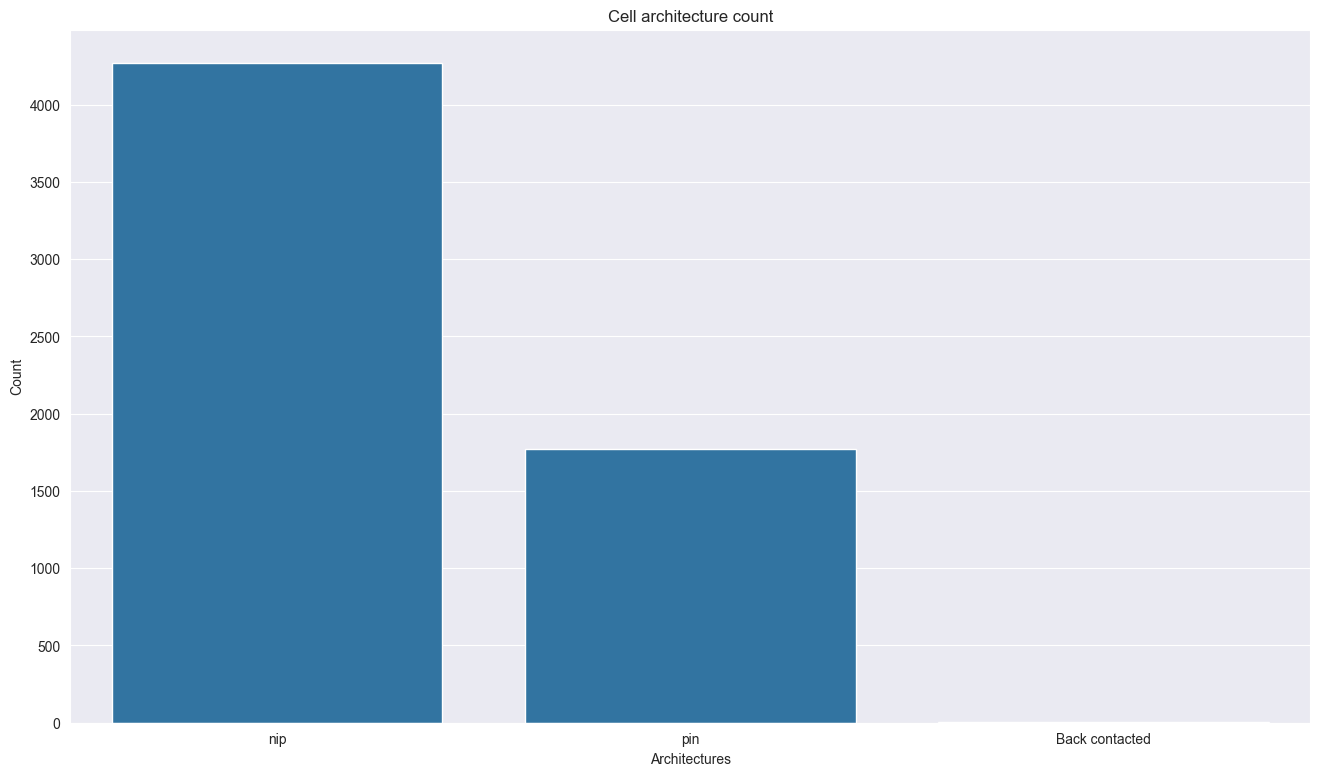

In [20]:
# check nip - pin architecture count
plt.figure(figsize=(16, 9))
architecture_value_counts = df["Cell_architecture"].value_counts()
sns.barplot(x=architecture_value_counts.index, y=architecture_value_counts.values)
plt.title("Cell architecture count")
plt.xlabel("Architectures")
plt.ylabel("Count")
plt.show()

In [21]:
# remove back contacted
df = df[~(df["Cell_architecture"] == "Back contacted")]

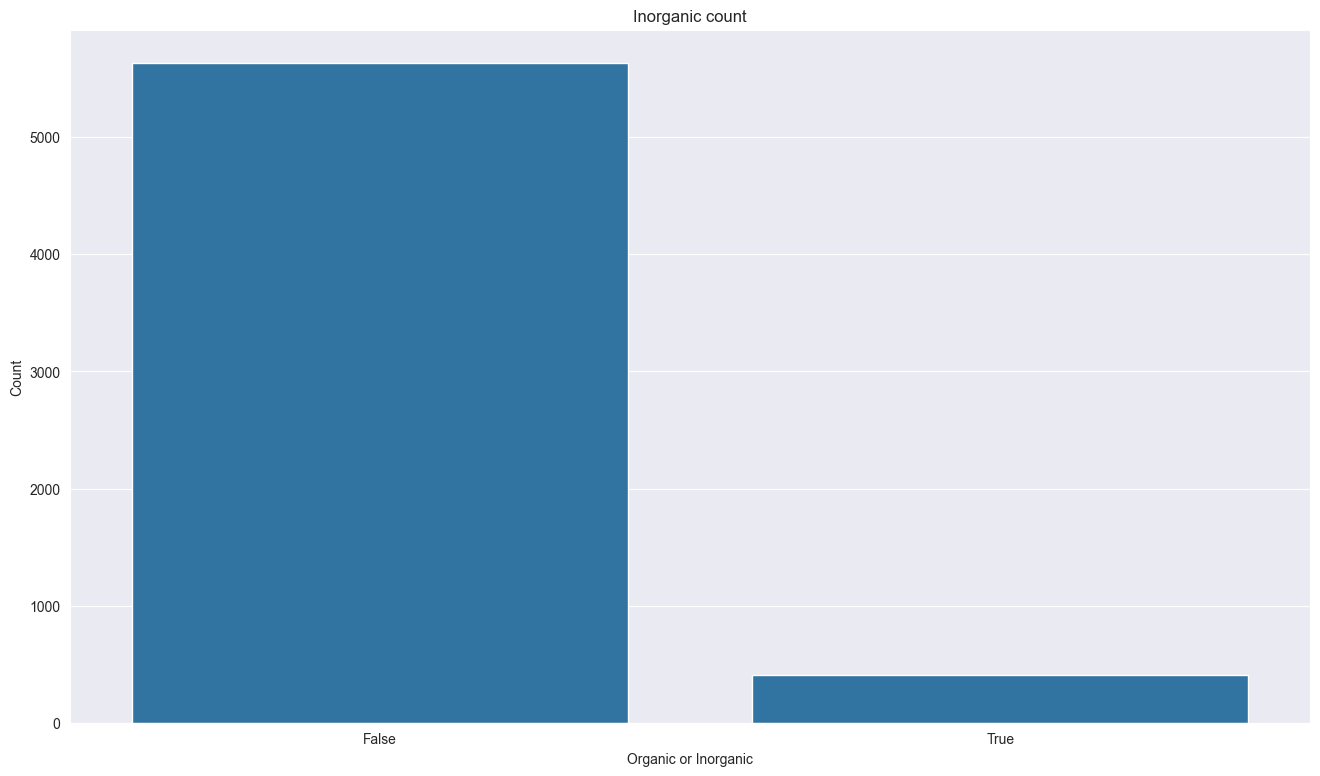

In [22]:
# check inorganic-organic
plt.figure(figsize=(16, 9))
inorganic_value_counts = df["inorganic_composition"].value_counts()
sns.barplot(x=inorganic_value_counts.index, y=inorganic_value_counts.values)
plt.title("Inorganic count")
plt.xlabel("Organic or Inorganic")
plt.ylabel("Count")
plt.show()

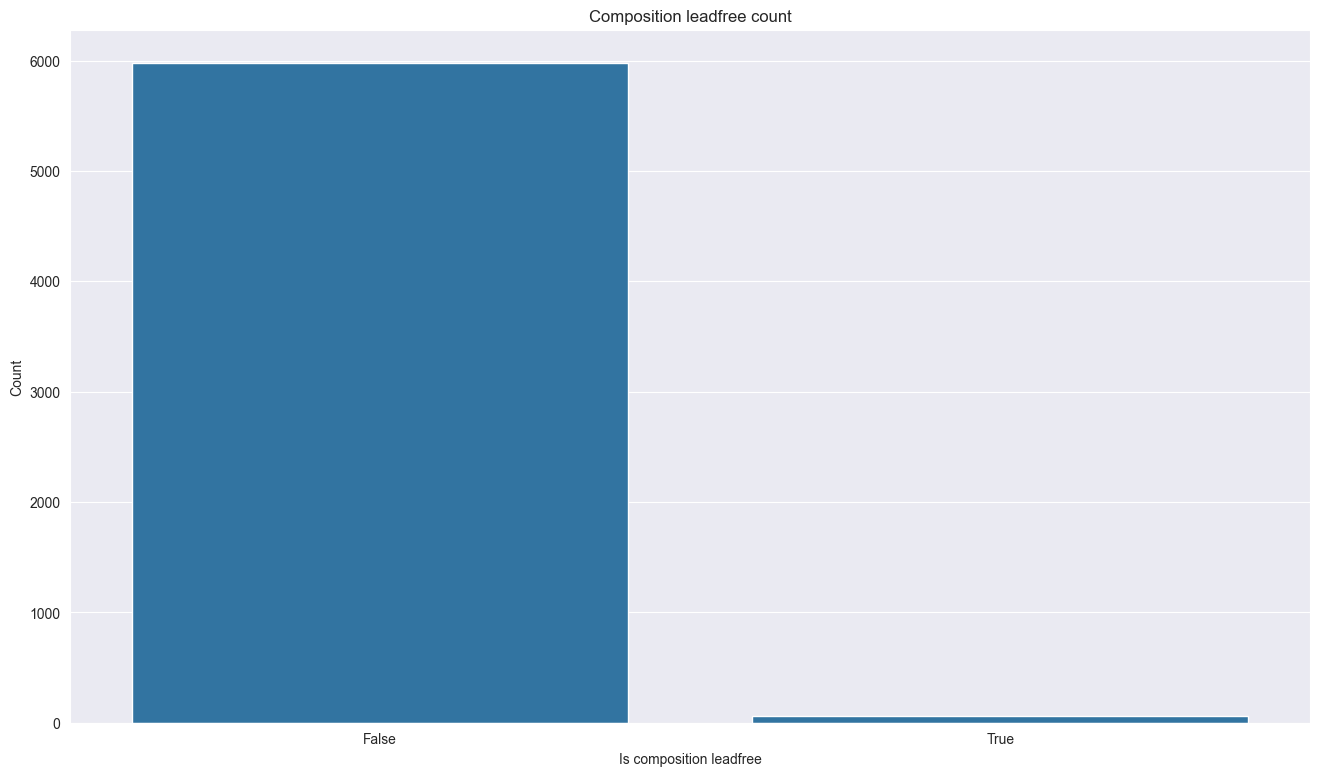

In [23]:
# check how many compositions leadfree
plt.figure(figsize=(16, 9))
leadfree_value_counts = df["Perovskite_composition_leadfree"].value_counts()
sns.barplot(x=leadfree_value_counts.index, y=leadfree_value_counts.values)
plt.title("Composition leadfree count")
plt.xlabel("Is composition leadfree")
plt.ylabel("Count")
plt.show()

In [24]:
# remove this feature at all
df = df.drop(columns=["Perovskite_composition_leadfree"])

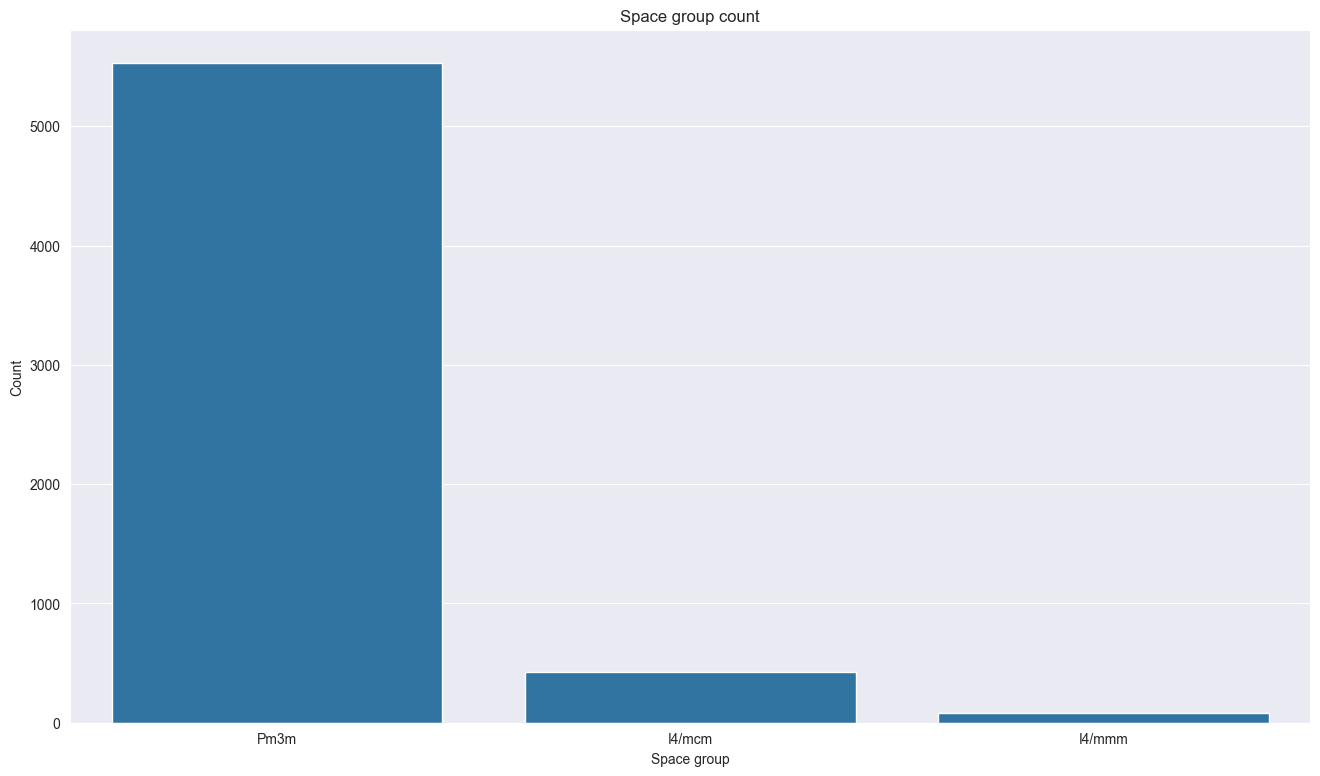

In [25]:
# check space groups
plt.figure(figsize=(16, 9))
space_group_value_counts = df["space_group"].value_counts()
sns.barplot(x=space_group_value_counts.index, y=space_group_value_counts.values)
plt.title("Space group count")
plt.xlabel("Space group")
plt.ylabel("Count")
plt.show()

In [26]:
# model will be trained for only cubic perovskites
df = df[df["space_group"] != SpaceGroup.CUBIC.value]
df = df.drop(columns=["space_group"])

In [27]:
# drop dimension related columns
df = df.drop(columns=["Perovskite_dimension_2D3D_mixture", "Perovskite_dimension_2D", "Perovskite_dimension_3D", "Perovskite_dimension_3D_with_2D_capping_layer"])

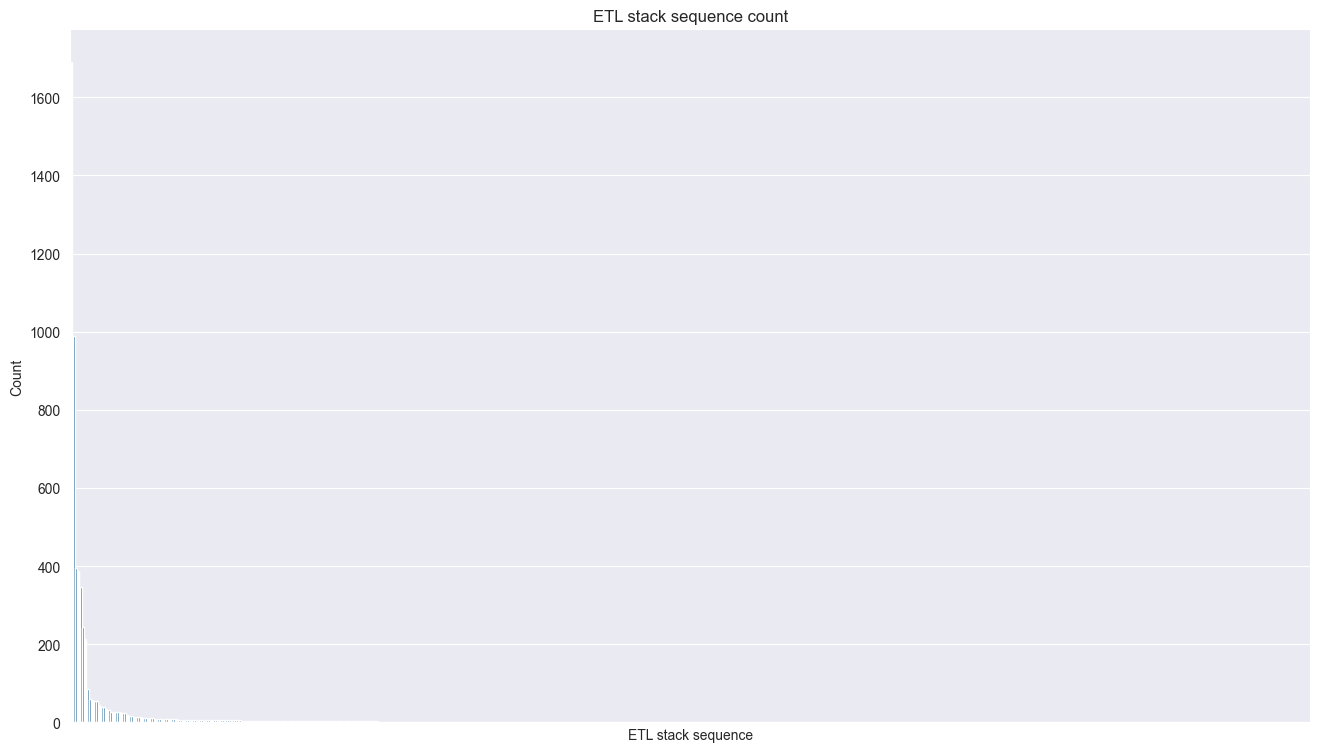

In [28]:
# check mapping result of ETL - clear in need
plt.figure(figsize=(16, 9))
etl_stack_sequence_counts = df["ETL_stack_sequence"].value_counts()
sns.barplot(x=etl_stack_sequence_counts.index, y=etl_stack_sequence_counts.values)
plt.title("ETL stack sequence count")
plt.xlabel("ETL stack sequence")
plt.xticks(ticks=[])
plt.ylabel("Count")
plt.show()

In [29]:
 # filter
etl_stack_sequence_threshold = 200
df = df[df['ETL_stack_sequence'].map(df['ETL_stack_sequence'].value_counts()) >= etl_stack_sequence_threshold]
df

,inorganic_composition,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,A_4_coef,...,Perovskite_deposition_solvent_annealing,Cell_area_measured,Encapsulation,TS80,_composition,r_A,r_B,r_C,octahedral_factor,tolerance_factor
2,False,1.600000,MA,0,0,0,1,0,0,0.0,...,False,0.04,False,220.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
3,False,1.600000,MA,0,0,0,1,0,0,0.0,...,False,0.04,False,350.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
4,False,1.590000,Cs,FA,MA,0,0.05,0.788,0.162,0.0,...,False,0.06,False,200.00000,"{'A': {'Cs': 0.05, 'FA': 0.788, 'MA': 0.162}, ...",2.42868,1.19,2.15920,0.551130,0.968626
5,False,1.587281,FA,MA,0,0,0.85,0.15,0,0.0,...,False,0.09,False,1524.89000,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 1....",2.47600,1.19,2.16400,0.549908,0.978228
6,False,1.584191,Cs,FA,MA,0,0.05,0.827,0.123,0.0,...,False,0.16,False,150.00000,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,False,1.630000,MA,0,0,0,1,0,0,0.0,...,False,0.09,False,500.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6992,False,1.647505,MA,0,0,0,1,0,0,0.0,...,False,0.04,False,72.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6993,False,1.647505,MA,0,0,0,1,0,0,0.0,...,False,0.04,False,2192.57000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6994,False,1.446241,FA,MA,0,0,0.85,0.15,0,0.0,...,False,0.16,False,101.40700,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 0....",2.47600,0.00,2.16400,0.000000,1.516162


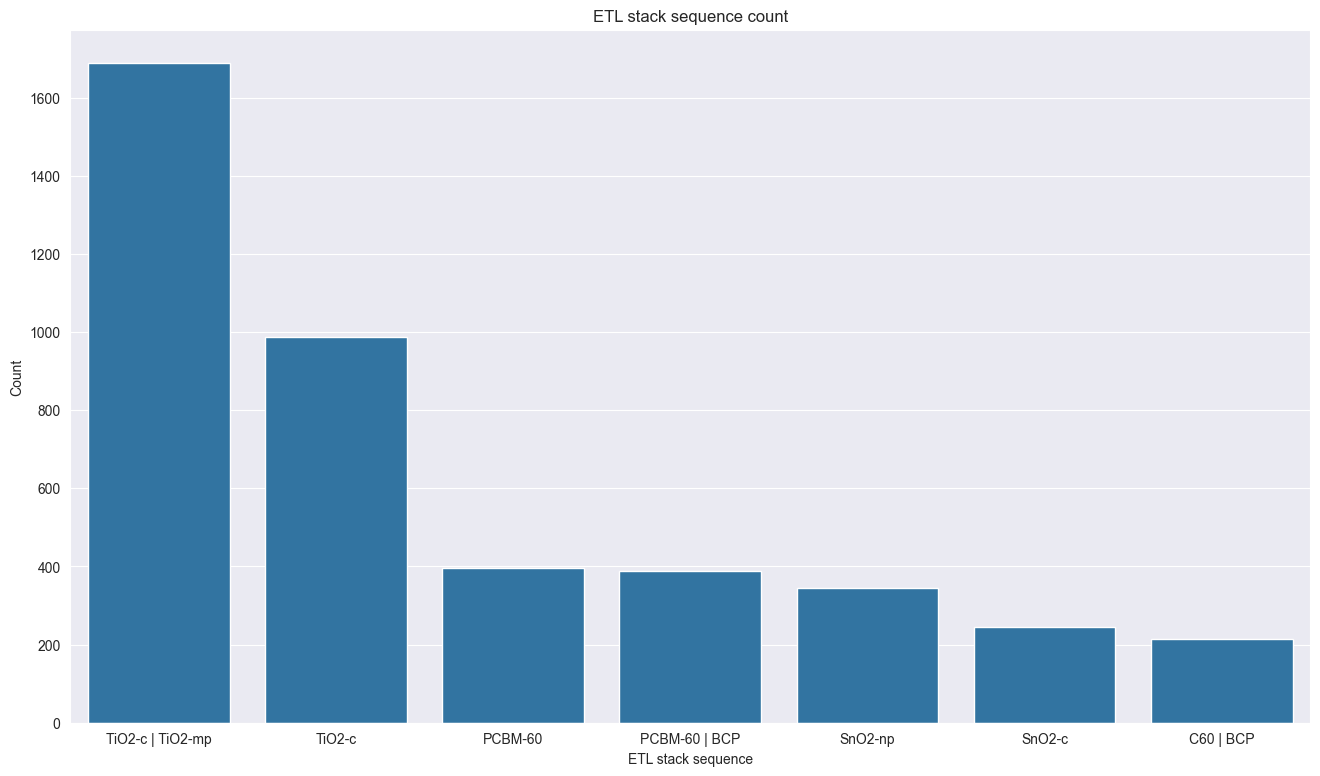

In [30]:
plt.figure(figsize=(16, 9))
etl_stack_sequence_counts = df["ETL_stack_sequence"].value_counts()
sns.barplot(x=etl_stack_sequence_counts.index, y=etl_stack_sequence_counts.values)
plt.title("ETL stack sequence count")
plt.xlabel("ETL stack sequence")
plt.ylabel("Count")
plt.show()

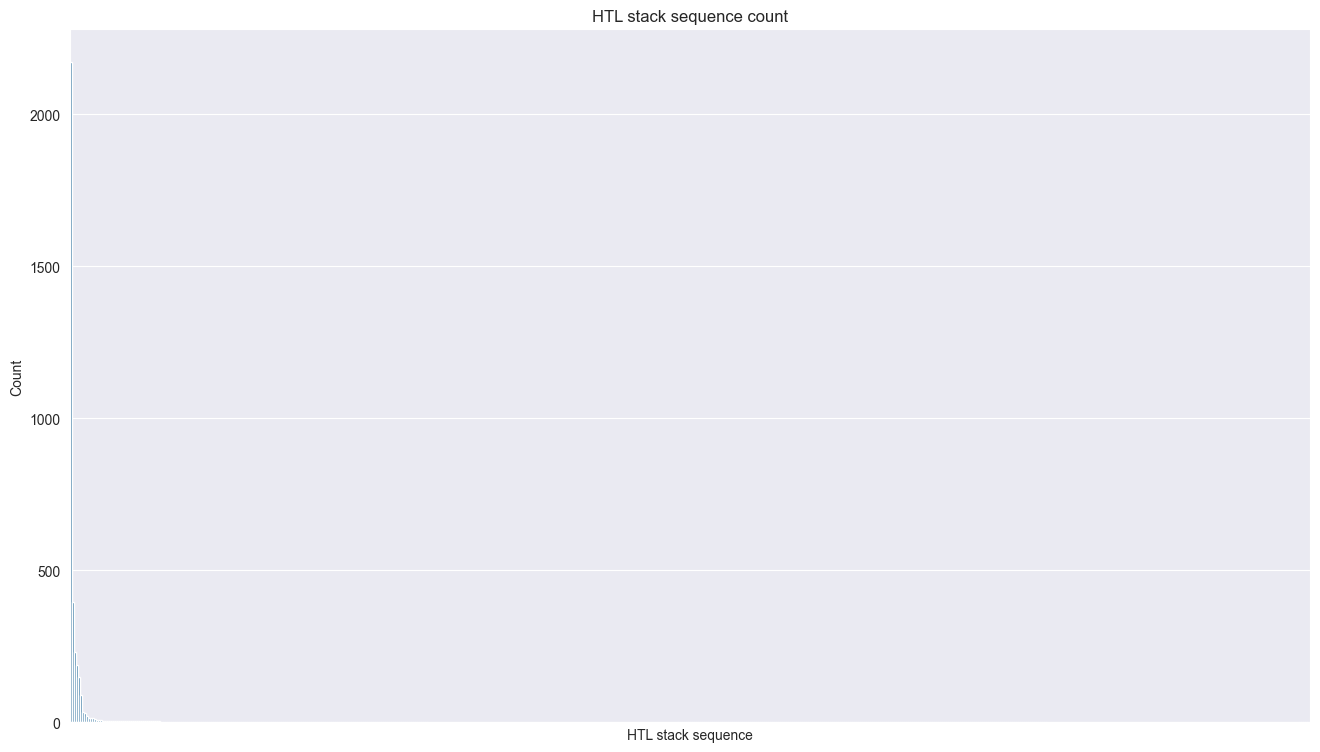

In [31]:
plt.figure(figsize=(16, 9))
htl_stack_sequence_counts = df["HTL_stack_sequence"].value_counts()
sns.barplot(x=htl_stack_sequence_counts.index, y=htl_stack_sequence_counts.values)
plt.title("HTL stack sequence count")
plt.xlabel("HTL stack sequence")
plt.xticks(ticks=[])
plt.ylabel("Count")
plt.show()

In [32]:
# drop HTL stack sequence cause it we will remain only one value
df = df.drop(columns=["HTL_stack_sequence"])

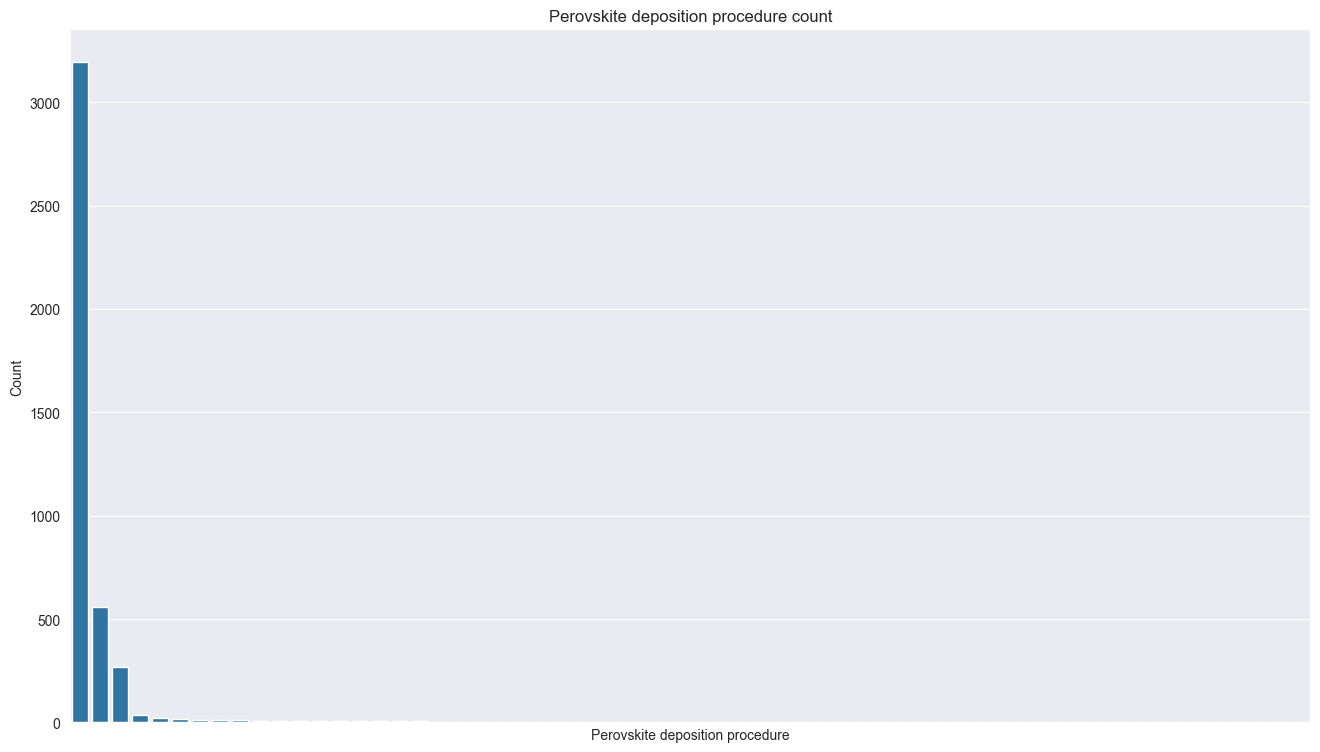

In [33]:
# check deposition procedure
plt.figure(figsize=(16, 9))
deposition_procedure_counts = df["Perovskite_deposition_procedure"].value_counts()
sns.barplot(x=deposition_procedure_counts.index, y=deposition_procedure_counts.values)
plt.xticks(ticks=[])
plt.title("Perovskite deposition procedure count")
plt.xlabel("Perovskite deposition procedure")
plt.ylabel("Count")
plt.show()

In [34]:
# same as HTL - drop
df = df.drop(columns=["Perovskite_deposition_procedure"])

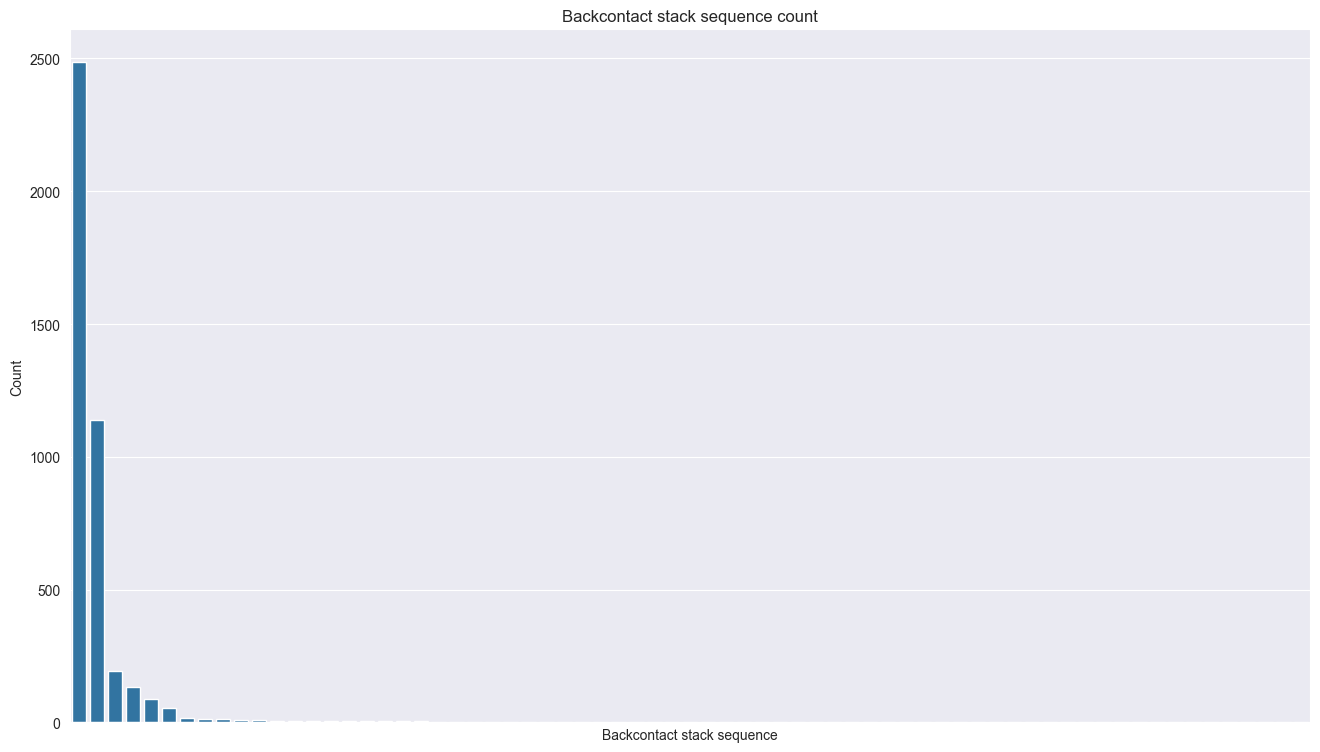

In [35]:
# check backcontact
plt.figure(figsize=(16, 9))
backcontact_counts = df["Backcontact_stack_sequence"].value_counts()
sns.barplot(x=backcontact_counts.index, y=backcontact_counts.values)
plt.xticks(ticks=[])
plt.title("Backcontact stack sequence count")
plt.xlabel("Backcontact stack sequence")
plt.ylabel("Count")
plt.show()

In [36]:
backcontact_counts

Backcontact_stack_sequence
Au                       2485
Ag                       1138
Carbon                    192
Al                        134
MoO3 | Ag                  87
                         ... 
Cu-ribbon                   1
rGO | Au                    1
Carbon | Carbon-fibre       1
Graphite | Cu-tape          1
MoO3 | AuAg | MoO3          1
Name: count, Length: 69, dtype: int64

In [37]:
values_to_keep = ["Au", "Ag"]
df = df[df["Backcontact_stack_sequence"].str.strip().isin(values_to_keep)]

In [38]:
df

,inorganic_composition,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,A_4_coef,...,Perovskite_deposition_solvent_annealing,Cell_area_measured,Encapsulation,TS80,_composition,r_A,r_B,r_C,octahedral_factor,tolerance_factor
2,False,1.600000,MA,0,0,0,1,0,0,0.0,...,False,0.04,False,220.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
3,False,1.600000,MA,0,0,0,1,0,0,0.0,...,False,0.04,False,350.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
4,False,1.590000,Cs,FA,MA,0,0.05,0.788,0.162,0.0,...,False,0.06,False,200.00000,"{'A': {'Cs': 0.05, 'FA': 0.788, 'MA': 0.162}, ...",2.42868,1.19,2.15920,0.551130,0.968626
6,False,1.584191,Cs,FA,MA,0,0.05,0.827,0.123,0.0,...,False,0.16,False,150.00000,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702
7,False,1.584191,Cs,FA,MA,0,0.05,0.827,0.123,0.0,...,False,0.16,False,961.12200,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,False,1.630000,MA,0,0,0,1,0,0,0.0,...,False,0.09,False,500.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6992,False,1.647505,MA,0,0,0,1,0,0,0.0,...,False,0.04,False,72.00000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6993,False,1.647505,MA,0,0,0,1,0,0,0.0,...,False,0.04,False,2192.57000,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6994,False,1.446241,FA,MA,0,0,0.85,0.15,0,0.0,...,False,0.16,False,101.40700,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 0....",2.47600,0.00,2.16400,0.000000,1.516162


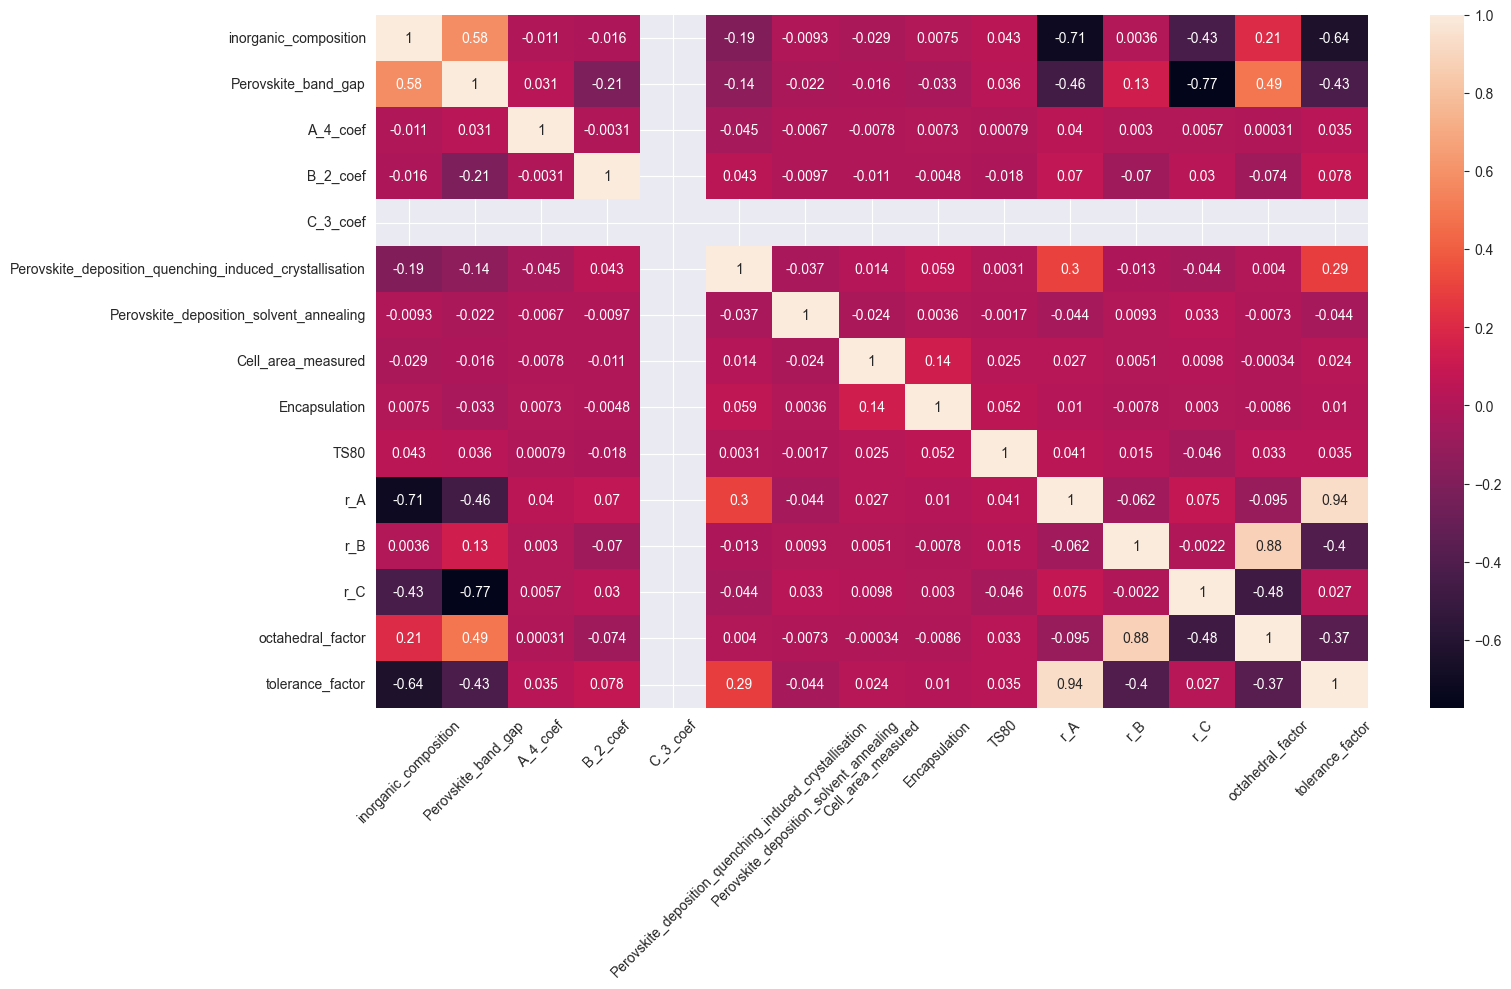

In [39]:
# check correlation for numerical columns
num_columns = [col for col in df.columns if df[col].dtype != np.object_]
plt.figure(figsize=(16, 9))
sns.heatmap(df[num_columns].corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

### Encodings and build model

In [40]:
# encode dfs categorical values
from perovskite_prediction_api..structure import BackContact, ETLStacks, CellArchitecture
from perovskite_prediction_api.entities.v1.Element import Element

def encode_ion(ion: str):
    if isinstance(ion, int) or ion == "0":
        return ion
    ion = ion.replace("(", "").replace(")", "").strip()
    element = Element.get_element_by_name(ion)
    return element.code

ion_cols = ["A_1", "A_2", "A_3", "A_4", "B_1", "B_2", "C_1", "C_2", "C_3"]
for col in ion_cols:
    df[col] = df[col].apply(encode_ion).astype(int)

df["Encapsulation"] = df["Encapsulation"].map({True: 1, False: 0})
df["ETL_stack_sequence"] = df["ETL_stack_sequence"].apply(lambda value: ETLStacks.get_code_by_name(value))
df["Cell_architecture"] = df["Cell_architecture"].apply(lambda value: CellArchitecture.get_code_by_name(value))
df["Backcontact_stack_sequence"] = df["Backcontact_stack_sequence"].apply(lambda value: BackContact.get_code_by_name(value))
df["Perovskite_deposition_quenching_induced_crystallisation"] = df["Perovskite_deposition_quenching_induced_crystallisation"].map({True: 1, False: 0})
df["inorganic_composition"] = df["inorganic_composition"].map({True: 1, False: 0})
df = df.drop(columns=["Perovskite_deposition_solvent_annealing"])

In [41]:
df = df.drop(columns=["_composition"], axis=1)
df

,inorganic_composition,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,A_4_coef,...,Backcontact_stack_sequence,Perovskite_deposition_quenching_induced_crystallisation,Cell_area_measured,Encapsulation,TS80,r_A,r_B,r_C,octahedral_factor,tolerance_factor
2,0,1.600000,1,0,0,0,1,0,0,0.0,...,1,1,0.04,0,220.00000,2.17000,1.19,2.20000,0.540909,0.911521
3,0,1.600000,1,0,0,0,1,0,0,0.0,...,1,1,0.04,0,350.00000,2.17000,1.19,2.20000,0.540909,0.911521
4,0,1.590000,3,2,1,0,0.05,0.788,0.162,0.0,...,1,1,0.06,0,200.00000,2.42868,1.19,2.15920,0.551130,0.968626
6,0,1.584191,3,2,1,0,0.05,0.827,0.123,0.0,...,1,1,0.16,0,150.00000,2.44272,1.19,2.17048,0.548266,0.970702
7,0,1.584191,3,2,1,0,0.05,0.827,0.123,0.0,...,1,1,0.16,0,961.12200,2.44272,1.19,2.17048,0.548266,0.970702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,1.630000,1,0,0,0,1,0,0,0.0,...,1,1,0.09,0,500.00000,2.17000,1.19,2.20000,0.540909,0.911521
6992,0,1.647505,1,0,0,0,1,0,0,0.0,...,2,1,0.04,0,72.00000,2.17000,1.19,2.20000,0.540909,0.911521
6993,0,1.647505,1,0,0,0,1,0,0,0.0,...,2,1,0.04,0,2192.57000,2.17000,1.19,2.20000,0.540909,0.911521
6994,0,1.446241,2,1,0,0,0.85,0.15,0,0.0,...,1,1,0.16,0,101.40700,2.47600,0.00,2.16400,0.000000,1.516162


In [42]:
df = df.rename(columns={
    "Perovskite_band_gap": "band_gap",
    "ETL_stack_sequence": "etl_stack_sequence",
    "Perovskite_deposition_quenching_induced_crystallisation": "perovskite_deposition_quenching_induced_crystallisation",
    "Cell_area_measured": "cell_area_measured",
    "Backcontact_stack_sequence": "backcontact_stack_sequence"
})
coef_cols = [col for col in df.columns if col.endswith("_coef")]
for col in coef_cols:
    df[col] = df[col].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3623 entries, 2 to 6995
Data columns (total 32 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   inorganic_composition                                    3623 non-null   int64  
 1   band_gap                                                 3623 non-null   float64
 2   A_1                                                      3623 non-null   int64  
 3   A_2                                                      3623 non-null   int64  
 4   A_3                                                      3623 non-null   int64  
 5   A_4                                                      3623 non-null   int64  
 6   A_1_coef                                                 3623 non-null   float64
 7   A_2_coef                                                 3623 non-null   float64
 8   A_3_coef                         

### Build model

In [43]:
# build simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X, y = df.drop(columns=["TS80"]), df["TS80"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 for lin reg: ", r2)
print("MSE for lin_reg: ", mse)
print("Coefficients for features: ")
pd.DataFrame([lin_reg.coef_], columns=X.columns)

R2 for lin reg:  0.014258859464349682
MSE for lin_reg:  8130390.92012958
Coefficients for features: 


/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


,inorganic_composition,band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,A_4_coef,...,etl_stack_sequence,backcontact_stack_sequence,perovskite_deposition_quenching_induced_crystallisation,cell_area_measured,Encapsulation,r_A,r_B,r_C,octahedral_factor,tolerance_factor
0,640.879771,890.809667,174.747535,-15.432255,-518.696237,630.536895,-123.603249,-9.135912,138.996746,-114.428819,...,44.510413,-289.162453,-52.470351,-26.372212,450.429234,-24142.401338,-43579.652969,69204.622203,211633.345491,117958.136095


In [44]:
# get the best hyperparameters with GCV and build XGBoost Regressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

random_state = 42

param_grid = {
    "n_estimators": [700, 800, 900, 1000, 1100],
    "learning_rate": [0.1, 0.3, 0.5, 0.7, 0.9, 1.1],
    "min_child_weight": [0.4, 0.5, 0.6, 0.8],
    "gamma": [0.05, 0.007, 0.009, 0.1],
    "subsample": [0.4, 0.5, 0.6, 0.7],
    "colsample_bytree": [0.3, 0.4, 0.6, 0.7],
}

xgb = XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=random_state
)

search_cv = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)
search_cv.fit(X_train, y_train)
model = search_cv.best_estimator_

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

results = {
        "best_params": search_cv.best_params_,
        "best_cv_score": search_cv.best_score_,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_mse": train_mse,
        "test_mse": test_mse
    }

# Print results
print("Best Parameters:", results["best_params"])
print(f"Best Cross-Validation R² Score: {results['best_cv_score']:.4f}")
print(f"Train R²: {results['train_r2']:.4f}, Test R²: {results['test_r2']:.4f}")
print(f"Train MSE: {results['train_mse']:.4f}, Test MSE: {results['test_mse']:.4f}")

Exception ignored on calling ctypes callback function <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x122caad00>>:
Traceback (most recent call last):
  File "/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/xgboost/core.py", line 582, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument
KeyboardInterrupt: 


KeyboardInterrupt: 